<a href="https://colab.research.google.com/github/elpinchepastel/convolutional-networks/blob/master/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
# Load files
#from google.colab import files
#foto = files.upload()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/My Drive/IA/img/'
elemento = 'ares.jpg'
#path = path + elemento

In [6]:
import os
path = os.path.join(path, elemento)

In [7]:
image = Image.open(path)
print(image.size)

(1536, 1024)


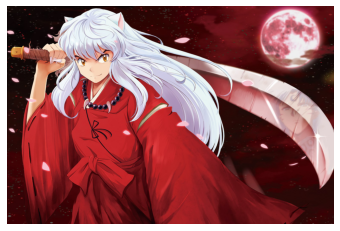

In [8]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [9]:
image_tensor = TF.to_tensor(image).to(device)
print(image_tensor.shape)

torch.Size([3, 1024, 1536])


In [10]:
# 4 dimensiones para redes neuronales convolucionales
image_tensor = image_tensor.unsqueeze(0) # Adiciona la dimensión
print(image_tensor.shape)

torch.Size([1, 3, 1024, 1536])


In [11]:
# Covolución normal
convolucion = nn.Conv2d(3, 3, 3).to(device) # Primero canales de entreda, Segundo canales de salida, Tercero tamaño del Kernel
image_conv = convolucion(image_tensor).to(device)
print(image_conv.shape)
image_conv = image_conv.squeeze(0).to(device)
print(image_conv.shape)
image_conv = image_conv.to('cpu')
image_conv = TF.to_pil_image(image_conv)
print(image_conv.size)

torch.Size([1, 3, 1022, 1534])
torch.Size([3, 1022, 1534])
(1534, 1022)


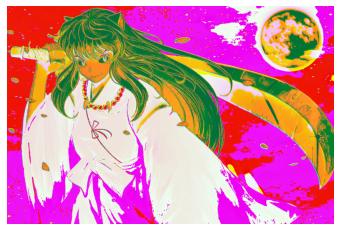

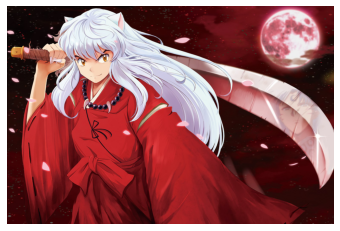

In [12]:
plt.imshow(image_conv)
plt.axis('off')
plt.show()
plt.imshow(image)
plt.axis('off')
plt.show()

In [13]:
# max pool convolution
max_pool = nn.MaxPool2d(2).to(device)
image_pool = max_pool(image_tensor).to(device)
print(image_pool.shape)
image_pool = image_pool.squeeze(0).to(device)
image_pool = image_pool.to('cpu')
image_pool = TF.to_pil_image(image_pool)
print(image_pool.size)

torch.Size([1, 3, 512, 768])
(768, 512)


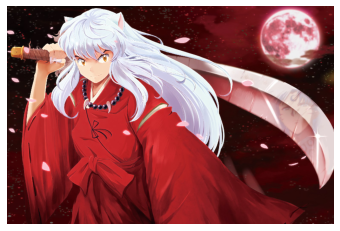

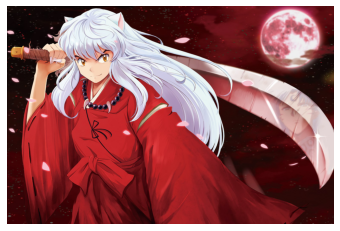

In [14]:
plt.imshow(image_pool)
plt.axis('off')
plt.show()
plt.imshow(image)
plt.axis('off')
plt.show()

In [15]:
image_conv_padding = nn.Conv2d(3, 3, 2, padding=1).to(device)
print(image_tensor.shape)
image_padding = image_conv_padding(image_tensor).to(device)
print(image_padding.shape)
image_padding = image_padding.squeeze(0).to(device)
image_padding = image_padding.to('cpu')
image_padding = TF.to_pil_image(image_padding)
print(image_padding.size)
print(image_conv_padding)

torch.Size([1, 3, 1024, 1536])
torch.Size([1, 3, 1025, 1537])
(1537, 1025)
Conv2d(3, 3, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))


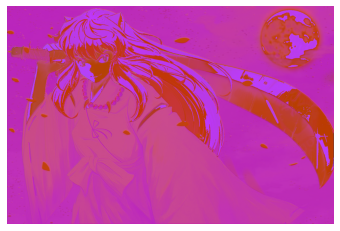

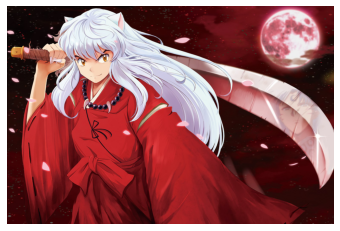

In [16]:
plt.imshow(image_padding)
plt.axis('off')
plt.show()
plt.imshow(image)
plt.axis('off')
plt.show()

In [17]:
## Ecuación de las capas convulocionales [(W-K+2P)/S]+1

In [27]:
# Propagacion der tensores hacia adelante (forward propagation)
class Anime(nn.Module):
  def __init__(self):
    super(Anime, self).__init__()
    self.conv1 = nn.Conv2d(3, 3, 2)
    self.max1 = nn.MaxPool2d(2)
    self.conv2= nn.Conv2d(3, 3, 2, stride=2)
    self.conv3 = nn.Conv2d(3, 3, 2)
    self.linear1 = nn.Linear(291084, 100) # Capa Linear, solo recibe de datos de entrada y salida

  def forward (self, x):
    x = self.conv1(x)
    print(x.shape)
    x = self.max1(x)
    print(x.shape)
    x = self.conv2(x)
    print(x.shape)
    x = F.relu(x) # Función de activación
    x = self.conv3(x)
    print(x.shape)
    x = x.view(-1, 291084)
    x = self.linear1(x)
    return x

modelo = Anime().to(device)

In [28]:
print('Tamaño del tensor original', image_tensor.shape)
oputs = modelo(image_tensor)
#oputs = oputs.squeeze(0).to(device)
#oputs = oputs.to('cpu')
#oputs = TF.to_pil_image(oputs)
print(oputs.shape)

Tamaño del tensor original torch.Size([1, 3, 1024, 1536])
torch.Size([1, 3, 1023, 1535])
torch.Size([1, 3, 511, 767])
torch.Size([1, 3, 255, 383])
torch.Size([1, 3, 254, 382])
torch.Size([1, 100])


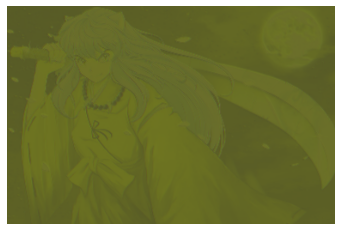

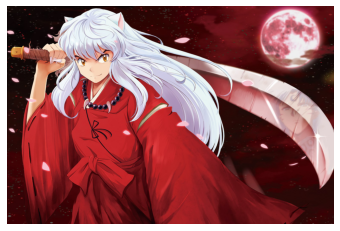

In [20]:
plt.imshow(oputs)
plt.axis('off')
plt.show()
plt.imshow(image)
plt.axis('off')
plt.show()